**Import essential library**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

import sklearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import warnings
warnings.simplefilter("ignore")


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Load dataset**

In [2]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

In [3]:
# Load dataset
def load_data():
    data =pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/processing_file.csv", engine='python')
    return data

In [4]:
tweet_df = load_data()
tweet_df.head()

,Unnamed: 0,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,label,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0,MeNyrbie PhilGahan Chrisitv httpstcoiFzFAnPa a...,"['menyrbie', 'philgahan', 'chrisitv', 'httpstc...","['menyrbie', 'philgahan', 'chrisitv', 'httpstc...","['menyrbi', 'philgahan', 'chrisitv', 'httpstco...","['menyrbie', 'philgahan', 'chrisitv', 'httpstc..."
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1.0,advice Talk to your neighbours family to excha...,"['advice', 'talk', 'to', 'your', 'neighbours',...","['advice', 'talk', 'neighbours', 'family', 'ex...","['advic', 'talk', 'neighbour', 'famili', 'exch...","['advice', 'talk', 'neighbour', 'family', 'exc..."
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1.0,Coronavirus Australia Woolworths to give elder...,"['coronavirus', 'australia', 'woolworths', 'to...","['coronavirus', 'australia', 'woolworths', 'gi...","['coronaviru', 'australia', 'woolworth', 'give...","['coronavirus', 'australia', 'woolworth', 'giv..."
3,3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,1.0,My food stock is not the only one which is emp...,"['my', 'food', 'stock', 'is', 'not', 'the', 'o...","['food', 'stock', 'one', 'empty', 'please', 'd...","['food', 'stock', 'one', 'empti', 'pleas', 'do...","['food', 'stock', 'one', 'empty', 'please', 'd..."
4,4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3.0,Me ready to go at supermarket during the COVID...,"['me', 'ready', 'to', 'go', 'at', 'supermarket...","['ready', 'go', 'supermarket', 'covid', 'outbr...","['readi', 'go', 'supermarket', 'covid', 'outbr...","['ready', 'go', 'supermarket', 'covid', 'outbr..."


**Drop unnecessary columns**

In [5]:
tweet_df.drop(['TweetAt', 'OriginalTweet','Sentiment' ], axis=1, inplace= True)

In [6]:
tweet_df.head(10)

,Unnamed: 0,UserName,ScreenName,Location,label,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,0,3799,48751,London,0.0,MeNyrbie PhilGahan Chrisitv httpstcoiFzFAnPa a...,"['menyrbie', 'philgahan', 'chrisitv', 'httpstc...","['menyrbie', 'philgahan', 'chrisitv', 'httpstc...","['menyrbi', 'philgahan', 'chrisitv', 'httpstco...","['menyrbie', 'philgahan', 'chrisitv', 'httpstc..."
1,1,3800,48752,UK,1.0,advice Talk to your neighbours family to excha...,"['advice', 'talk', 'to', 'your', 'neighbours',...","['advice', 'talk', 'neighbours', 'family', 'ex...","['advic', 'talk', 'neighbour', 'famili', 'exch...","['advice', 'talk', 'neighbour', 'family', 'exc..."
2,2,3801,48753,Vagabonds,1.0,Coronavirus Australia Woolworths to give elder...,"['coronavirus', 'australia', 'woolworths', 'to...","['coronavirus', 'australia', 'woolworths', 'gi...","['coronaviru', 'australia', 'woolworth', 'give...","['coronavirus', 'australia', 'woolworth', 'giv..."
3,3,3802,48754,NaN,1.0,My food stock is not the only one which is emp...,"['my', 'food', 'stock', 'is', 'not', 'the', 'o...","['food', 'stock', 'one', 'empty', 'please', 'd...","['food', 'stock', 'one', 'empti', 'pleas', 'do...","['food', 'stock', 'one', 'empty', 'please', 'd..."
4,4,3803,48755,NaN,3.0,Me ready to go at supermarket during the COVID...,"['me', 'ready', 'to', 'go', 'at', 'supermarket...","['ready', 'go', 'supermarket', 'covid', 'outbr...","['readi', 'go', 'supermarket', 'covid', 'outbr...","['ready', 'go', 'supermarket', 'covid', 'outbr..."
5,5,3804,48756,"ÜT: 36.319708,-82.363649",1.0,As news of the regions first confirmed COVID ...,"['as', 'news', 'of', 'the', 'region', 's', 'fi...","['news', 'region', 'first', 'confirmed', 'covi...","['news', 'region', 'first', 'confirm', 'covid'...","['news', 'region', 'first', 'confirmed', 'covi..."
6,6,3805,48757,"35.926541,-78.753267",1.0,Cashier at grocery store was sharing his insig...,"['cashier', 'at', 'grocery', 'store', 'was', '...","['cashier', 'grocery', 'store', 'sharing', 'in...","['cashier', 'groceri', 'store', 'share', 'insi...","['cashier', 'grocery', 'store', 'sharing', 'in..."
7,7,3806,48758,Austria,0.0,Was at the supermarket today Didnt buy toilet ...,"['was', 'at', 'the', 'supermarket', 'today', '...","['supermarket', 'today', 'didnt', 'buy', 'toil...","['supermarket', 'today', 'didnt', 'buy', 'toil...","['supermarket', 'today', 'didnt', 'buy', 'toil..."
8,8,3807,48759,"Atlanta, GA USA",1.0,Due to COVID our retail store and classroom in...,"['due', 'to', 'covid', 'our', 'retail', 'store...","['due', 'covid', 'retail', 'store', 'classroom...","['due', 'covid', 'retail', 'store', 'classroom...","['due', 'covid', 'retail', 'store', 'classroom..."
9,9,3808,48760,"BHAVNAGAR,GUJRAT",NaN,For corona preventionwe should stop to buy thi...,"['for', 'corona', 'preventionwe', 'should', 's...","['corona', 'preventionwe', 'stop', 'buy', 'thi...","['corona', 'preventionw', 'stop', 'buy', 'thin...","['corona', 'preventionwe', 'stop', 'buy', 'thi..."


In [7]:
tweet_df.drop('Unnamed: 0',inplace=True,axis = 1)

In [8]:
tweet_df.drop(['Tweet_punct', 'Tweet_tokenized','Tweet_nonstop', 'ScreenName', 'Location' ], axis=1, inplace= True)

In [9]:
tweet_df.head(10)

,UserName,label,Tweet_stemmed,Tweet_lemmatized
0,3799,0.0,"['menyrbi', 'philgahan', 'chrisitv', 'httpstco...","['menyrbie', 'philgahan', 'chrisitv', 'httpstc..."
1,3800,1.0,"['advic', 'talk', 'neighbour', 'famili', 'exch...","['advice', 'talk', 'neighbour', 'family', 'exc..."
2,3801,1.0,"['coronaviru', 'australia', 'woolworth', 'give...","['coronavirus', 'australia', 'woolworth', 'giv..."
3,3802,1.0,"['food', 'stock', 'one', 'empti', 'pleas', 'do...","['food', 'stock', 'one', 'empty', 'please', 'd..."
4,3803,3.0,"['readi', 'go', 'supermarket', 'covid', 'outbr...","['ready', 'go', 'supermarket', 'covid', 'outbr..."
5,3804,1.0,"['news', 'region', 'first', 'confirm', 'covid'...","['news', 'region', 'first', 'confirmed', 'covi..."
6,3805,1.0,"['cashier', 'groceri', 'store', 'share', 'insi...","['cashier', 'grocery', 'store', 'sharing', 'in..."
7,3806,0.0,"['supermarket', 'today', 'didnt', 'buy', 'toil...","['supermarket', 'today', 'didnt', 'buy', 'toil..."
8,3807,1.0,"['due', 'covid', 'retail', 'store', 'classroom...","['due', 'covid', 'retail', 'store', 'classroom..."
9,3808,NaN,"['corona', 'preventionw', 'stop', 'buy', 'thin...","['corona', 'preventionwe', 'stop', 'buy', 'thi..."


In [10]:
tweet_df.isnull().sum()

UserName               2
label               9929
Tweet_stemmed         16
Tweet_lemmatized      16
dtype: int64

In [11]:
tweet_df= tweet_df.dropna()

In [12]:
messages= tweet_df.copy()
messages.reset_index()

,index,UserName,label,Tweet_stemmed,Tweet_lemmatized
0,0,3799,0.0,"['menyrbi', 'philgahan', 'chrisitv', 'httpstco...","['menyrbie', 'philgahan', 'chrisitv', 'httpstc..."
1,1,3800,1.0,"['advic', 'talk', 'neighbour', 'famili', 'exch...","['advice', 'talk', 'neighbour', 'family', 'exc..."
2,2,3801,1.0,"['coronaviru', 'australia', 'woolworth', 'give...","['coronavirus', 'australia', 'woolworth', 'giv..."
3,3,3802,1.0,"['food', 'stock', 'one', 'empti', 'pleas', 'do...","['food', 'stock', 'one', 'empty', 'please', 'd..."
4,4,3803,3.0,"['readi', 'go', 'supermarket', 'covid', 'outbr...","['ready', 'go', 'supermarket', 'covid', 'outbr..."
...,...,...,...,...,...
31231,41161,44950,2.0,"['mrsilverscott', 'definit', 'man', 'feel', 'l...","['mrsilverscott', 'definitely', 'man', 'feel',..."
31232,41162,44951,0.0,"['airlin', 'pilot', 'offer', 'stock', 'superma...","['airline', 'pilot', 'offering', 'stock', 'sup..."
31233,41163,44952,3.0,"['respons', 'complaint', 'provid', 'cite', 'co...","['response', 'complaint', 'provided', 'citing'..."
31234,41164,44953,1.0,"['know', 'get', 'tough', 'kameronwild', 'ratio...","['know', 'getting', 'tough', 'kameronwilds', '..."


**Bi gram approach**

In [13]:
tfidf_biagram = TfidfVectorizer(sublinear_tf=True,
                            analyzer='word',
                            lowercase = False,
                            ngram_range=(2, 2),
                            max_features=8000)

In [14]:
messages['Tweet_lemmatized']= messages['Tweet_lemmatized'].astype(str)

In [15]:
X_biagram = tfidf_biagram.fit_transform(messages['Tweet_lemmatized'])
X_biagram

<31236x8000 sparse matrix of type '<class 'numpy.float64'>'
	with 132681 stored elements in Compressed Sparse Row format>

In [16]:
Y_biagram = messages['label']

In [17]:
Y_biagram.shape,X_biagram.shape

((31236,), (31236, 8000))

In [18]:
smk_biagram = SMOTETomek(random_state=42)
X_biagram_v1,Y_biagram_v1=smk_biagram.fit_sample(X_biagram,Y_biagram)

In [19]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y_biagram)))
print('Resampled dataset shape {}'.format(Counter(Y_biagram_v1)))

Original dataset shape Counter({1.0: 11421, 0.0: 7711, 2.0: 6624, 3.0: 5480})
Resampled dataset shape Counter({3.0: 11272, 2.0: 11146, 0.0: 11062, 1.0: 10924})


**Spliting data for Biagram Model**

In [39]:
# data Split
# Biagram Model
# let's see how well our model perform on this new data
x_train_biagram,x_test_biagram,y_train_biagram,y_test_biagram = train_test_split(X_biagram_v1,Y_biagram_v1,test_size = 0.30, random_state= True)

**Confusion Matrix Function**

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Supervised Learning Algorithm**

**Support Vector Machine Algorithm**

SVM  Algo
              precision    recall  f1-score   support

         0.0       0.68      0.50      0.58      3318
         1.0       0.58      0.20      0.29      3177
         2.0       0.57      0.65      0.61      3357
         3.0       0.51      0.89      0.65      3470

    accuracy                           0.57     13322
   macro avg       0.59      0.56      0.53     13322
weighted avg       0.59      0.57      0.54     13322

Accuracy Score: 0.5673322323975379
Confusion matrix, without normalization


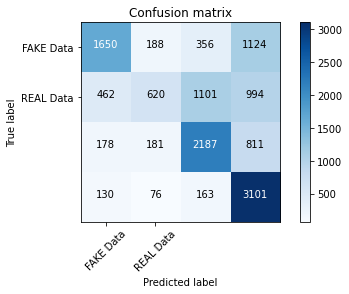

In [41]:
# SVM
svm_class_biagram = svm.SVC(kernel='poly')
svm_class_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_svm = svm_class_biagram.predict(x_test_biagram)
predictions_svm = svm_class_biagram.predict(x_test_biagram)
print("SVM  Algo")
print(classification_report(y_test_biagram, y_pred_svm))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_svm))

#Confusion matrix
cm_svm = metrics.confusion_matrix(y_test_biagram, y_pred_svm)
plot_confusion_matrix(cm_svm, classes=['FAKE Data', 'REAL Data'])


**Decission Tree Classifier**

Decission Tree Classifier
              precision    recall  f1-score   support

         0.0       0.48      0.63      0.54      3318
         1.0       0.41      0.38      0.39      3177
         2.0       0.59      0.50      0.54      3357
         3.0       0.68      0.62      0.65      3470

    accuracy                           0.54     13322
   macro avg       0.54      0.53      0.53     13322
weighted avg       0.54      0.54      0.54     13322

Accuracy Score: 0.5322023720162138
Confusion matrix, without normalization


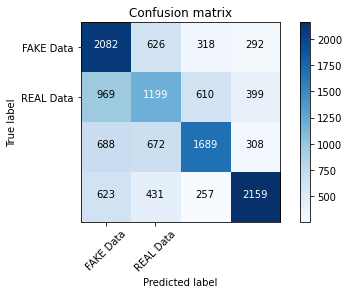

In [42]:
# Decission Tree Classifier
decession_tree_biagram = DecisionTreeClassifier()
decession_tree_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_decession_tree_biagram = decession_tree_biagram.predict(x_test_biagram)
#predictions_dt = decession_tree_biagram.predict(x_test_biagram)
print("Decission Tree Classifier")
print(classification_report(y_test_biagram, y_pred_decession_tree_biagram))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_dt))

#Confusion matrix
cm_dtc = metrics.confusion_matrix(y_test_biagram, y_pred_decession_tree_biagram)
plot_confusion_matrix(cm_dtc, classes=['FAKE Data', 'REAL Data'])

**Random Forest  Classifier**

Random Forest  Classifier
              precision    recall  f1-score   support

         0.0       0.52      0.75      0.61      3318
         1.0       0.50      0.34      0.40      3177
         2.0       0.67      0.62      0.64      3357
         3.0       0.76      0.72      0.74      3470

    accuracy                           0.61     13322
   macro avg       0.61      0.60      0.60     13322
weighted avg       0.61      0.61      0.60     13322

Accuracy Score: 0.6075664314667467
Confusion matrix, without normalization


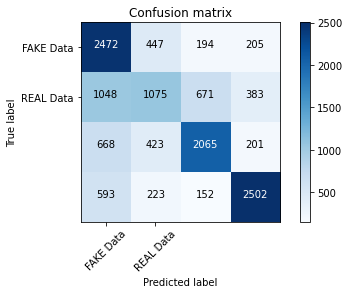

In [43]:

# Random Forest  Classifier
random_forest_biagram = RandomForestClassifier()
random_forest_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_random_forest_biagram = random_forest_biagram.predict(x_test_biagram)

#predictions_rf = random_forest_biagram.predict(x_test_biagram)
print("Random Forest  Classifier")
print(classification_report(y_test_biagram, y_pred_random_forest_biagram))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_rf))

#Confusion matrix
cm_rf = metrics.confusion_matrix(y_test_biagram, y_pred_random_forest_biagram)
plot_confusion_matrix(cm_rf, classes=['FAKE Data', 'REAL Data'])

**KNN  Algorithm**

KNN  Algo
              precision    recall  f1-score   support

         0.0       0.45      0.65      0.53      3318
         1.0       0.45      0.09      0.15      3177
         2.0       0.49      0.57      0.53      3357
         3.0       0.55      0.64      0.59      3470

    accuracy                           0.49     13322
   macro avg       0.48      0.49      0.45     13322
weighted avg       0.49      0.49      0.45     13322

Accuracy Score: 0.49271881098934095
Confusion matrix, without normalization


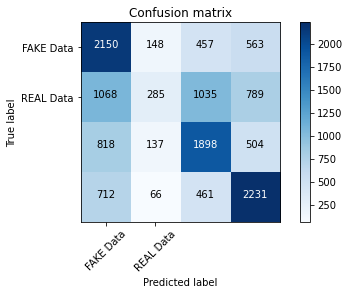

In [44]:

# KNN  Algorithm
knn_classifier_biagram = KNeighborsClassifier()
knn_classifier_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_knn_classifier_bigram = knn_classifier_biagram.predict(x_test_biagram)
predictions_knn = knn_classifier_biagram.predict(x_test_biagram)
print("KNN  Algo")
print(classification_report(y_test_biagram, y_pred_knn_classifier_bigram))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_knn))

#Confusion matrix
cm_knn = metrics.confusion_matrix(y_test_biagram, y_pred_knn_classifier_bigram)
plot_confusion_matrix(cm_knn, classes=['FAKE Data', 'REAL Data'])

**Gradient bossting**

GradientBosting  Algo
              precision    recall  f1-score   support

         0.0       0.34      0.84      0.48      3318
         1.0       0.36      0.23      0.28      3177
         2.0       0.65      0.32      0.42      3357
         3.0       0.78      0.36      0.49      3470

    accuracy                           0.43     13322
   macro avg       0.53      0.43      0.42     13322
weighted avg       0.54      0.43      0.42     13322

Accuracy Score: 0.4347695541210029
Confusion matrix, without normalization


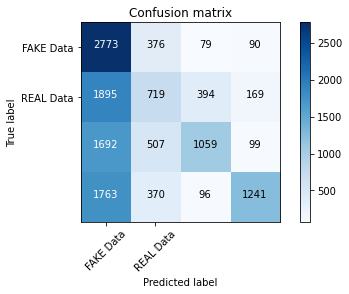

In [48]:
# Gradient bossting
gradient_bossting_biagram  = GradientBoostingClassifier(random_state=3)
gradient_bossting_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_gradientbossting = gradient_bossting_biagram.predict(x_test_biagram)
#predictions_gb = gradient_bossting_biagram.predict(x_test_biagram)
print("GradientBosting  Algo")
print(classification_report(y_test_biagram, y_pred_gradientbossting))
print('Accuracy Score:',accuracy_score(y_test_biagram, y_pred_gradientbossting))

#Confusion matrix
cm_gb = metrics.confusion_matrix(y_test_biagram, y_pred_gradientbossting)
plot_confusion_matrix(cm_gb, classes=['FAKE Data', 'REAL Data'])

**Multinomial Naive Bayes**

Multinomial Naive Bias
              precision    recall  f1-score   support

         0.0       0.54      0.59      0.57      3318
         1.0       0.42      0.29      0.34      3177
         2.0       0.61      0.58      0.59      3357
         3.0       0.58      0.72      0.64      3470

    accuracy                           0.55     13322
   macro avg       0.54      0.54      0.53     13322
weighted avg       0.54      0.55      0.54     13322

Accuracy Score: 0.5486413451433718
Confusion matrix, without normalization


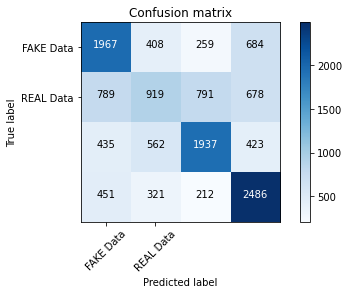

In [46]:
# Multinomial Naive Bias
mulNB_biagram  = MultinomialNB()
mulNB_biagram.fit(x_train_biagram,y_train_biagram)
y_pred_mulNB_biagram = mulNB_biagram.predict(x_test_biagram)
predictions_mnb = mulNB_biagram.predict(x_test_biagram)
print("Multinomial Naive Bias")
print(classification_report(y_test_biagram, y_pred_mulNB_biagram))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_mnb))

#Confusion matrix
cm_mnb = metrics.confusion_matrix(y_test_biagram, y_pred_mulNB_biagram)
plot_confusion_matrix(cm_mnb, classes=['FAKE Data', 'REAL Data'])

**Logistic Regression**

Logistic Reg  Algo
              precision    recall  f1-score   support

         0.0       0.55      0.59      0.57      3318
         1.0       0.45      0.34      0.38      3177
         2.0       0.62      0.59      0.60      3357
         3.0       0.60      0.72      0.66      3470

    accuracy                           0.56     13322
   macro avg       0.55      0.56      0.55     13322
weighted avg       0.56      0.56      0.56     13322

Accuracy Score: 0.5642546164239604
Confusion matrix, without normalization


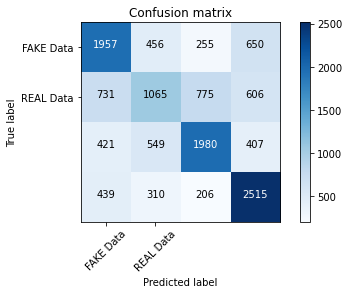

In [47]:
# Logistic Regression
logis_reg_bia =LogisticRegression()
logis_reg_bia.fit(x_train_biagram,y_train_biagram)
y_pred_log = logis_reg_bia.predict(x_test_biagram)
predictions_lr = logis_reg_bia.predict(x_test_biagram)
print("Logistic Reg  Algo")
print(classification_report(y_test_biagram, y_pred_log))
print('Accuracy Score:',accuracy_score(y_test_biagram, predictions_lr))

#Confusion matrix
cm_lr = metrics.confusion_matrix(y_test_biagram, y_pred_log)
plot_confusion_matrix(cm_lr, classes=['FAKE Data', 'REAL Data'])

**Passive Aggressive Classifier Algorithm**

accuracy:   0.583
Confusion matrix, without normalization


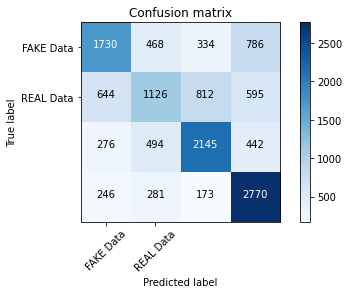

In [36]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt 
from sklearn import metrics
import numpy as np
import itertools
linear_clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
linear_clf.fit(x_train_biagram, y_train_biagram)
pred = linear_clf.predict(x_test_biagram)
score = metrics.accuracy_score(y_test_biagram, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test_biagram, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


**Multinomial Classifier with Hyperparameter**

In [37]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train_biagram,y_train_biagram)
    y_pred=sub_classifier.predict(x_test_biagram)
    score = metrics.accuracy_score(y_test_biagram, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.5634289145773907
Alpha: 0.1, Score : 0.5622278937096532
Alpha: 0.2, Score : 0.5602762347995797
Alpha: 0.30000000000000004, Score : 0.5569734274133014
Alpha: 0.4, Score : 0.5545713856778262
Alpha: 0.5, Score : 0.5534454286143222
Alpha: 0.6000000000000001, Score : 0.5522444077465846
Alpha: 0.7000000000000001, Score : 0.5506680678576791
Alpha: 0.8, Score : 0.5494670469899414
Alpha: 0.9, Score : 0.5487164089476054


**Cross Validation on top of ML algorithm**

**Cross validiate for passive aggressive classifier**

In [50]:
from sklearn.model_selection import cross_validate
cv_pac= cross_validate(linear_clf, X_biagram_v1, Y_biagram_v1, cv=10)
print(cv_pac['test_score'])
print(cv_pac['test_score'].mean())

[0.54379644 0.53343841 0.51655033 0.53163702 0.54864865 0.59189189
 0.65337838 0.67184685 0.65675676 0.66441441]
0.5912359139143647


In [51]:
model_score_pac= pd.DataFrame(cv_pac)
model_score_pac

,fit_time,score_time,test_score
0,0.801350,0.001999,0.543796
1,0.967662,0.001418,0.533438
2,0.774358,0.001359,0.516550
3,0.878373,0.001346,0.531637
4,0.656818,0.001266,0.548649
5,0.631859,0.001213,0.591892
6,0.547036,0.001257,0.653378
7,0.639446,0.001249,0.671847
8,0.544831,0.001274,0.656757
9,0.503111,0.001231,0.664414


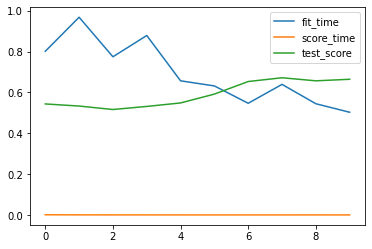

In [52]:
ax= model_score_pac.plot.line()

**Cross validiate for SVM**

In [ ]:
# cv_svm= cross_validate(svm_class_biagram, X_biagram_v1, Y_biagram_v1, cv=10)
# print(cv_svm['test_score'])
# print(cv_svm['test_score'].mean())

**Cross validiate for Logistic Regression**

In [55]:
cv_lr= cross_validate(logis_reg_bia, X_biagram_v1, Y_biagram_v1, cv=10)
print(cv_lr['test_score'])
print(cv_lr['test_score'].mean())

[0.5282594  0.52150417 0.49921189 0.49988741 0.51914414 0.57657658
 0.60968468 0.65045045 0.63941441 0.63445946]
0.567859259845299


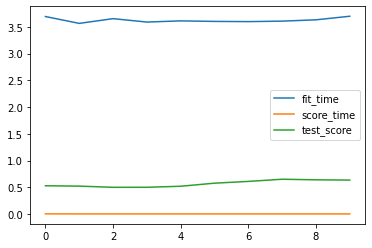

In [57]:
model_score_lr= pd.DataFrame(cv_lr)
ax_lr= model_score_lr.plot.line()

**Cross validiate for Decision tree**

In [58]:
cv_dtc= cross_validate(decession_tree_biagram, X_biagram_v1, Y_biagram_v1, cv=10)
print(cv_dtc['test_score'])
print(cv_dtc['test_score'].mean())

[0.49110561 0.49425805 0.48299932 0.48682729 0.50743243 0.53761261
 0.59301802 0.61193694 0.60608108 0.60698198]
0.5418253335524221


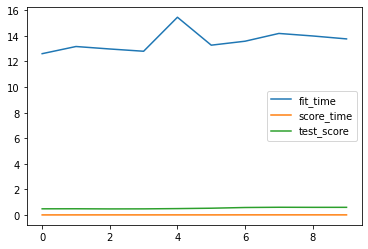

In [59]:
model_score_dtc= pd.DataFrame(cv_dtc)
ax_dtc= model_score_dtc.plot.line()

**Cross validiate for MultinomialNB**

In [60]:
cv_MNB= cross_validate(mulNB_biagram, X_biagram_v1, Y_biagram_v1, cv=10)
print(cv_MNB['test_score'])
print(cv_MNB['test_score'].mean())


[0.51902725 0.52330556 0.49403288 0.49831119 0.51283784 0.54932432
 0.58783784 0.60540541 0.60382883 0.59391892]
0.5487830027730951


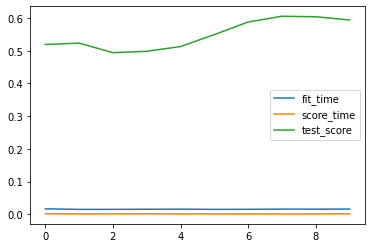

In [61]:
model_score_MNB= pd.DataFrame(cv_MNB)
ax_MNB= model_score_MNB.plot.line()